In [1]:
# --- CREDIT CARD FRAUD DETECTION PROJECT ---
# This notebook demonstrates step-by-step data preparation, exploratory data analysis (EDA), and preprocessing for the Credit Card Transactions Fraud Detection dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('ggplot')
sns.set_palette("Set2")
%matplotlib inline


In [7]:
# --- STEP 1: DATA LOADING AND INITIAL INSPECTION ---
# Load the dataset and perform initial exploration

In [8]:
df = pd.read_csv("fraudTrain.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (81703, 23)

First 5 rows:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [6]:
# --- STEP 2: DATASET OVERVIEW ---
# Understand the structure, data types, and missing values


In [9]:
print("=== DATASET INFORMATION ===")
print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nMissing Values Summary:")
missing_info = df.isnull().sum()
print(missing_info[missing_info > 0])

print("\nBasic Statistics:")
df.describe()

=== DATASET INFORMATION ===

Column Names and Data Types:
Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

Missing Values Summary:
job           1
dob           1
trans_num     1
unix_time     1
merch_lat     1
merch_long    1
is_fraud      1
dtype: int64

Basic Statistics:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,81703.000000,8.170300e+04,81703.000000,81703.000000,81703.000000,81703.000000,8.170300e+04,8.170200e+04,81702.000000,81702.000000,81702.000000
mean,40851.000000,4.198167e+17,72.020171,48750.463251,38.540303,-90.207547,8.979300e+04,1.327455e+09,38.540864,-90.209024,0.009816
std,23585.768859,1.311997e+18,149.924767,26922.422403,5.071784,13.821681,3.031172e+05,1.194827e+06,5.104599,13.834769,0.098590
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.670132,0.000000
25%,20425.500000,1.800429e+14,9.690000,26041.000000,34.668900,-96.790900,7.430000e+02,1.326452e+09,34.773376,-96.872814,0.000000
50%,40851.000000,3.519607e+15,47.990000,48174.000000,39.354300,-87.461600,2.456000e+03,1.327457e+09,39.369744,-87.407418,0.000000
75%,61276.500000,4.642255e+15,83.830000,72011.000000,41.846700,-80.128400,2.047800e+04,1.328457e+09,41.927733,-80.182705,0.000000
max,81702.000000,4.992346e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.329531e+09,66.659242,-66.967742,1.000000


In [10]:
# --- STEP 3: INITIAL DATA CLEANING ---
# Remove unnecessary columns and handle missing values

In [11]:
# Drop columns with too many unique values or irrelevant information
columns_to_drop = ['Unnamed: 0', 'first', 'last', 'merchant', 'street', 'trans_num', 'cc_num']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

print("Columns after cleaning:", df_clean.columns.tolist())
print("New shape:", df_clean.shape)

Columns after cleaning: ['trans_date_trans_time', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
New shape: (81703, 16)


In [12]:
# Handle missing values - drop rows with missing values since they are very few
initial_rows = len(df_clean)
df_clean = df_clean.dropna()
print(f"Dropped {initial_rows - len(df_clean)} rows with missing values")

Dropped 1 rows with missing values


In [13]:
# --- STEP 4: TARGET VARIABLE ANALYSIS ---
# Analyze the distribution of the target variable 'is_fraud'

In [14]:
print("=== TARGET VARIABLE ANALYSIS ===")
print("Value counts of is_fraud:")
print(df_clean['is_fraud'].value_counts())
print("\nPercentage distribution:")
print(df_clean['is_fraud'].value_counts(normalize=True) * 100)

=== TARGET VARIABLE ANALYSIS ===
Value counts of is_fraud:
is_fraud
0.0    80900
1.0      802
Name: count, dtype: int64

Percentage distribution:
is_fraud
0.0    99.018384
1.0     0.981616
Name: proportion, dtype: float64


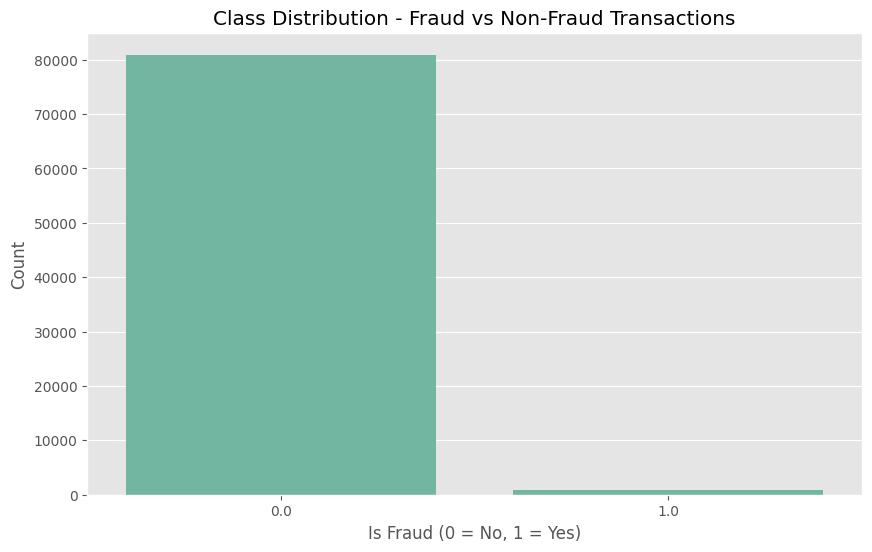

In [15]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='is_fraud', data=df_clean)
plt.title('Class Distribution - Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [16]:
# --- STEP 5: EXPLORATORY DATA ANALYSIS (EDA) ---
# Analyze distributions, patterns, and relationships

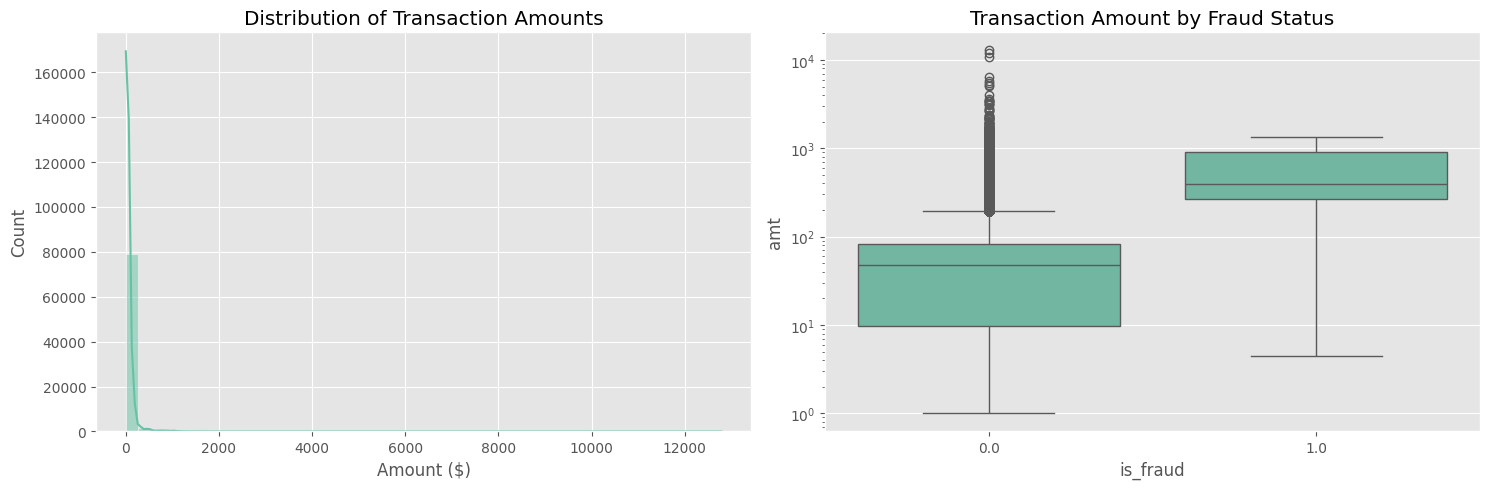

Transaction Amount Statistics by Fraud Status:
            count        mean         std  min       25%     50%       75%  \
is_fraud                                                                     
0.0       80900.0   67.426854  137.917841  1.0    9.6200   47.63   82.8300   
1.0         802.0  535.366646  393.068180  4.5  265.7275  390.22  907.5575   

               max  
is_fraud            
0.0       12788.07  
1.0        1334.07  


In [17]:
# 5.1 Transaction Amount Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')

plt.subplot(1, 2, 2)
sns.boxplot(x='is_fraud', y='amt', data=df_clean)
plt.title('Transaction Amount by Fraud Status')
plt.yscale('log')  # Log scale for better visualization

plt.tight_layout()
plt.show()

# Analyze amount statistics by fraud status
print("Transaction Amount Statistics by Fraud Status:")
print(df_clean.groupby('is_fraud')['amt'].describe())

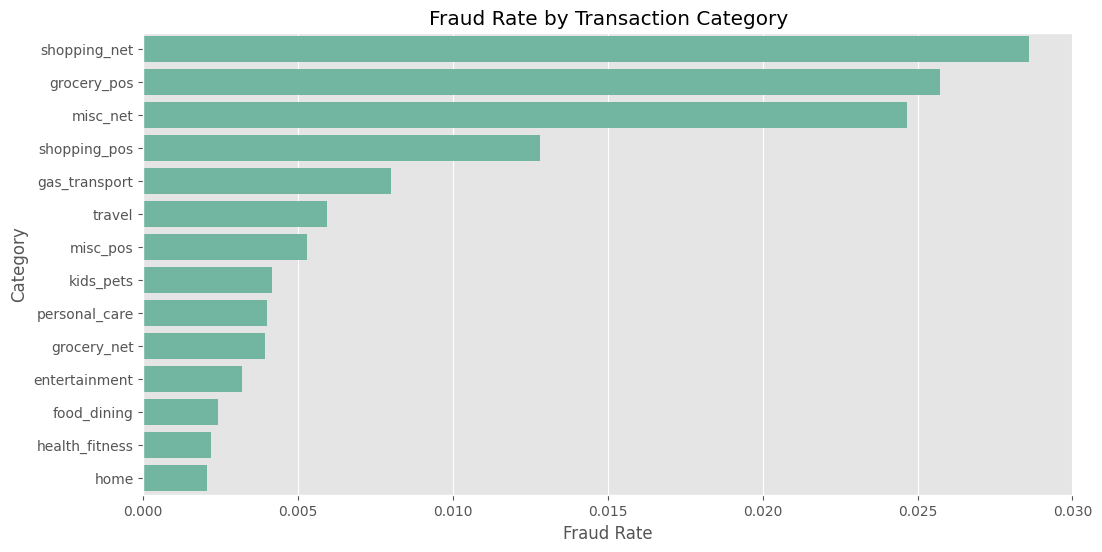

Fraud Rate by Category:
category
shopping_net      0.028599
grocery_pos       0.025715
misc_net          0.024670
shopping_pos      0.012796
gas_transport     0.008001
travel            0.005945
misc_pos          0.005278
kids_pets         0.004152
personal_care     0.003990
grocery_net       0.003915
entertainment     0.003200
food_dining       0.002405
health_fitness    0.002175
home              0.002049
Name: is_fraud, dtype: float64


In [18]:
# 5.2 Category Analysis
plt.figure(figsize=(12, 6))
category_fraud = df_clean.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

sns.barplot(x=category_fraud.values, y=category_fraud.index)
plt.title('Fraud Rate by Transaction Category')
plt.xlabel('Fraud Rate')
plt.ylabel('Category')
plt.show()

print("Fraud Rate by Category:")
print(category_fraud)

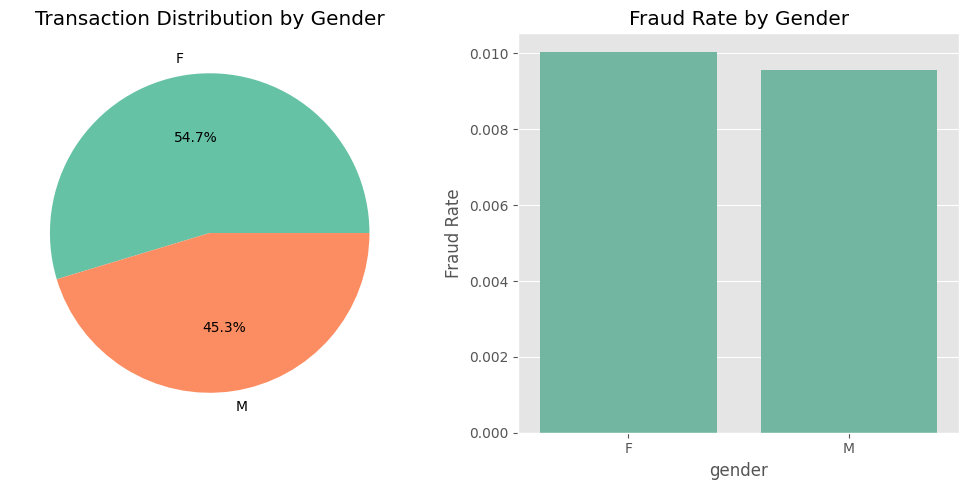

In [19]:
# 5.3 Gender Analysis
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
gender_count = df_clean['gender'].value_counts()
plt.pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%')
plt.title('Transaction Distribution by Gender')

plt.subplot(1, 2, 2)
gender_fraud = df_clean.groupby('gender')['is_fraud'].mean()
sns.barplot(x=gender_fraud.index, y=gender_fraud.values)
plt.title('Fraud Rate by Gender')
plt.ylabel('Fraud Rate')

plt.tight_layout()
plt.show()

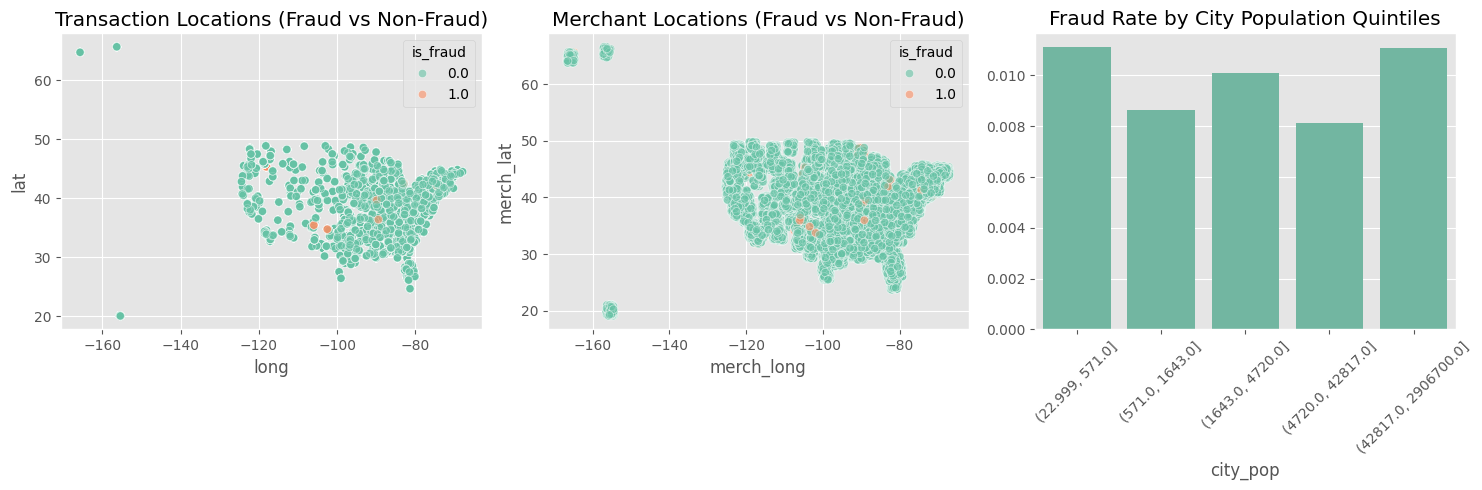

In [20]:
# 5.4 Geographic Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=df_clean, alpha=0.6)
plt.title('Transaction Locations (Fraud vs Non-Fraud)')

plt.subplot(1, 3, 2)
sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=df_clean, alpha=0.6)
plt.title('Merchant Locations (Fraud vs Non-Fraud)')

plt.subplot(1, 3, 3)
city_pop_fraud = df_clean.groupby(pd.qcut(df_clean['city_pop'], 5))['is_fraud'].mean()
sns.barplot(x=city_pop_fraud.index.astype(str), y=city_pop_fraud.values)
plt.title('Fraud Rate by City Population Quintiles')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

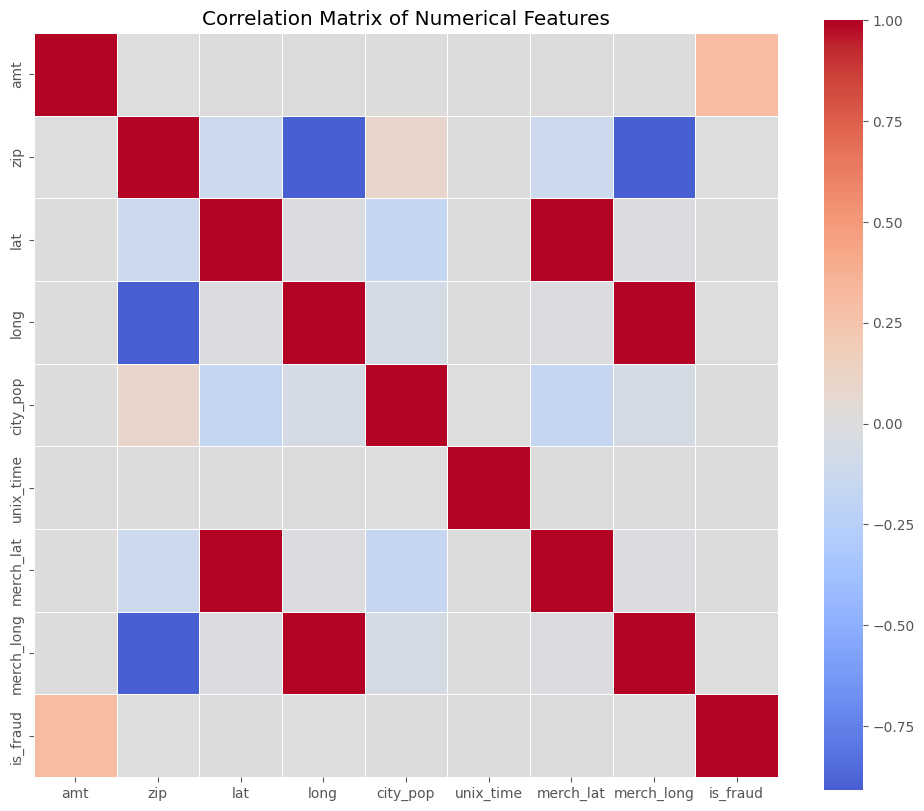

Correlation with Target Variable (is_fraud):
is_fraud      1.000000
amt           0.307713
lat           0.011563
merch_lat     0.011108
city_pop      0.007758
unix_time     0.007613
long         -0.001373
merch_long   -0.001392
zip          -0.004761
Name: is_fraud, dtype: float64


In [21]:
# 5.5 Correlation Analysis
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Check correlation with target variable
correlation_with_target = correlation_matrix['is_fraud'].sort_values(ascending=False)
print("Correlation with Target Variable (is_fraud):")
print(correlation_with_target)

In [22]:
# --- STEP 6: FEATURE ENGINEERING ---
# Create new features that might be predictive of fraud

In [26]:
df_fe = df_clean.copy()
print(f"Starting advanced feature engineering on dataframe with shape: {df_fe.shape}")

Starting advanced feature engineering on dataframe with shape: (81702, 16)


In [27]:
# --- 6.1 DATETIME CONVERSION AND BASIC TIME FEATURES ---
df_fe['trans_date_trans_time'] = pd.to_datetime(df_fe['trans_date_trans_time'])
df_fe['dob'] = pd.to_datetime(df_fe['dob'])

# Basic time features
df_fe['trans_hour'] = df_fe['trans_date_trans_time'].dt.hour
df_fe['trans_day'] = df_fe['trans_date_trans_time'].dt.day
df_fe['trans_month'] = df_fe['trans_date_trans_time'].dt.month
df_fe['trans_dayofweek'] = df_fe['trans_date_trans_time'].dt.dayofweek
df_fe['trans_is_weekend'] = df_fe['trans_dayofweek'].isin([5, 6]).astype(int)

# Age calculation
df_fe['age'] = (df_fe['trans_date_trans_time'] - df_fe['dob']).dt.days // 365

print("Basic time features created")

Basic time features created


In [28]:
# --- 6.2 ENHANCED TIME-BASED FEATURES ---
# More sophisticated time-based features

# Time of day categories
df_fe['time_of_day'] = pd.cut(df_fe['trans_hour'],
                             bins=[-1, 6, 12, 18, 24],
                             labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Business hours vs non-business hours
df_fe['is_business_hours'] = ((df_fe['trans_hour'] >= 9) &
                            (df_fe['trans_hour'] <= 17)).astype(int)

# Seasonal features
df_fe['season'] = pd.cut(df_fe['trans_month'],
                        bins=[0, 3, 6, 9, 12],
                        labels=['Winter', 'Spring', 'Summer', 'Fall'])

# Convert categorical time features to numerical
time_categorical = ['time_of_day', 'season']
for col in time_categorical:
    df_fe[col] = df_fe[col].astype('category').cat.codes

print("Enhanced time-based features created")

Enhanced time-based features created


In [29]:
# --- 6.3 GEOGRAPHICAL AND DISTANCE FEATURES ---
# Advanced location-based features

# Calculate distance between customer and merchant
df_fe['distance'] = np.sqrt(
    (df_fe['lat'] - df_fe['merch_lat'])**2 +
    (df_fe['long'] - df_fe['merch_long'])**2
)

# Regional clustering
df_fe['region'] = pd.cut(df_fe['lat'],
                       bins=5,
                       labels=['Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5'])

# Distance ratio (distance relative to typical distances)
avg_distance_by_category = df_fe.groupby('category')['distance'].mean().to_dict()
df_fe['distance_ratio'] = df_fe.apply(
    lambda x: x['distance'] / avg_distance_by_category.get(x['category'], 1), axis=1
)

# Unusual location patterns
df_fe['unusual_location'] = ((df_fe['distance'] >
                            df_fe['distance'].quantile(0.95))).astype(int)

df_fe['region'] = df_fe['region'].astype('category').cat.codes

print("Geographical features created")

Geographical features created


In [30]:
# --- 6.4 TRANSACTION PATTERN FEATURES ---
# Features that capture transaction behavior

# Amount-based features
df_fe['amt_log'] = np.log1p(df_fe['amt'])
df_fe['amt_per_pop'] = df_fe['amt'] / df_fe['city_pop']

# Transaction value categories
df_fe['is_high_value'] = (df_fe['amt'] > df_fe['amt'].quantile(0.95)).astype(int)
df_fe['is_low_value'] = (df_fe['amt'] < df_fe['amt'].quantile(0.05)).astype(int)
df_fe['is_round_amount'] = (df_fe['amt'] % 1 == 0).astype(int)

# Amount categories
df_fe['amount_category'] = pd.qcut(df_fe['amt'],
                                 q=5,
                                 labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_fe['amount_category'] = df_fe['amount_category'].astype('category').cat.codes

print("Transaction pattern features created")

Transaction pattern features created


In [31]:
# --- 6.5 BEHAVIORAL FEATURES ---
# Features that simulate user behavior patterns

# Transaction frequency by hour (simplified)
df_fe['transaction_frequency'] = df_fe.groupby('trans_hour')['trans_hour'].transform('count')

# Average amount by hour
df_fe['avg_trans_amount_by_hour'] = df_fe.groupby('trans_hour')['amt'].transform('mean')

# Amount deviation from typical behavior
df_fe['amt_deviation_from_avg'] = df_fe['amt'] - df_fe['avg_trans_amount_by_hour']
df_fe['amt_deviation_ratio'] = df_fe['amt'] / df_fe['avg_trans_amount_by_hour']

# Time since last transaction (simplified)
df_fe['time_since_last_trans'] = df_fe.groupby('trans_day')['trans_hour'].diff().fillna(0)

print("Behavioral features created")

Behavioral features created


In [32]:
# --- 6.6 INTERACTION FEATURES ---
# Features that capture interactions between variables

# Category + time interactions
df_fe['category_time_interaction'] = df_fe['category'] * df_fe['trans_hour']

# Amount + distance interactions
df_fe['amt_distance_interaction'] = df_fe['amt'] * df_fe['distance']

# Weekend + category interactions
df_fe['weekend_category_interaction'] = df_fe['trans_is_weekend'] * df_fe['category']

print("Interaction features created")

Interaction features created


In [37]:
# --- 6.7 FEATURE VALIDATION ---
# Check the new features

new_features = [
    'trans_hour', 'trans_day', 'trans_month', 'trans_dayofweek', 'trans_is_weekend',
    'age', 'distance', 'amt_log', 'amt_per_pop', 'time_of_day', 'is_business_hours',
    'season', 'region', 'distance_ratio', 'unusual_location', 'is_high_value',
    'is_low_value', 'is_round_amount', 'amount_category', 'transaction_frequency',
    'avg_trans_amount_by_hour', 'amt_deviation_from_avg', 'amt_deviation_ratio',
    'time_since_last_trans', 'category_time_interaction', 'amt_distance_interaction',
    'weekend_category_interaction'
]

print(f"Total new features created: {len(new_features)}")
print(f"New dataframe shape: {df_fe.shape}")

# Display first few rows with new features
display(df_fe[new_features[:10] + ['is_fraud']].head())

Total new features created: 27
New dataframe shape: (81702, 40)


,trans_hour,trans_day,trans_month,trans_dayofweek,trans_is_weekend,age,distance,amt_log,amt_per_pop,time_of_day,is_fraud
0,0,1,1,1,0,30,0.872830,1.786747,0.001422,0,0.0
1,0,1,1,1,0,40,0.272310,4.684259,0.719664,0,0.0
2,0,1,1,1,0,56,0.975845,5.398660,0.052987,0,0.0
3,0,1,1,1,0,52,0.919802,3.828641,0.023208,0,0.0
4,0,1,1,1,0,32,0.868505,3.760269,0.423838,0,0.0


In [38]:
# --- STEP 7: CATEGORICAL VARIABLE ENCODING ---
# Encode categorical variables for modeling

In [39]:
# Identify categorical columns
categorical_cols = ['category', 'gender', 'state', 'city', 'job']

print("Unique values in categorical columns:")
for col in categorical_cols:
    if col in df_fe.columns:
        print(f"{col}: {df_fe[col].nunique()} unique values")

Unique values in categorical columns:
category: 14 unique values
gender: 2 unique values


In [35]:
# Encode high cardinality features with label encoding
label_encoders = {}
for col in ['gender', 'category']:
    le = LabelEncoder()
    df_fe[col] = le.fit_transform(df_fe[col])
    label_encoders[col] = le

In [36]:
# For high cardinality features, we'll drop them
high_cardinality = ['city', 'state', 'job']
df_fe = df_fe.drop(columns=high_cardinality)

print("\nColumns after encoding and dropping high cardinality features:")
print(df_fe.columns.tolist())


Columns after encoding and dropping high cardinality features:
['trans_date_trans_time', 'category', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour', 'trans_day', 'trans_month', 'trans_dayofweek', 'trans_is_weekend', 'age', 'time_of_day', 'is_business_hours', 'season', 'distance', 'region', 'distance_ratio', 'unusual_location', 'amt_log', 'amt_per_pop', 'is_high_value', 'is_low_value', 'is_round_amount', 'amount_category', 'transaction_frequency', 'avg_trans_amount_by_hour', 'amt_deviation_from_avg', 'amt_deviation_ratio', 'time_since_last_trans', 'category_time_interaction', 'amt_distance_interaction', 'weekend_category_interaction']


In [42]:
# --- STEP 8: FINAL DATA PREPARATION ---
# Prepare data for modeling

In [43]:
# Drop original datetime columns
datetime_cols = ['trans_date_trans_time', 'dob']
df_fe = df_fe.drop(columns=datetime_cols, errors='ignore')

# Remove features that might cause data leakage
features_to_remove = [
    'transaction_frequency',
    'avg_trans_amount_by_hour',
]

In [44]:
df_final = df_fe.drop(columns=[col for col in features_to_remove if col in df_fe.columns])

# Separate features and target
X = df_final.drop(columns=['is_fraud'])
y = df_final['is_fraud']

print("Final dataset prepared!")
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")

Final dataset prepared!
Feature matrix shape: (81702, 35)
Target variable shape: (81702,)
Number of features: 35


In [45]:
# --- STEP 9: FEATURE SCALING ---
# Scale numerical features

In [46]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
scaler = RobustScaler()  # Robust to outliers
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("Features scaled using RobustScaler")
print("First 5 rows of scaled features:")
display(X.head())

Features scaled using RobustScaler
First 5 rows of scaled features:


,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,is_high_value,is_low_value,is_round_amount,amount_category,amt_deviation_from_avg,amt_deviation_ratio,time_since_last_trans,category_time_interaction,amt_distance_interaction,weekend_category_interaction
0,0.285714,-0.580254,0.0,-0.424625,-0.456338,0.377104,0.052648,-1.037870,-0.469427,0.321095,...,0.0,0.0,0.0,-1.0,-0.803290,-0.580824,0.0,,-0.459173,
1,-0.285714,0.799029,0.0,1.109115,1.328192,-1.845395,-0.116899,-1.037857,1.368300,-1.844149,...,0.0,0.0,0.0,1.0,0.699893,0.591048,0.0,,-0.030430,
2,-0.857143,2.321554,1.0,0.763063,0.393784,-1.488396,0.086040,-1.037854,0.528484,-1.482738,...,1.0,0.0,0.0,1.0,2.359186,1.884621,0.0,,3.170136,
3,-0.571429,-0.040329,1.0,0.249250,0.957995,-1.479502,-0.026197,-1.037841,1.071317,-1.507099,...,0.0,0.0,1.0,0.0,-0.214864,-0.122091,0.0,,0.179809,
4,0.428571,-0.081333,1.0,-0.516446,-0.130068,0.480042,-0.119432,-1.037786,-0.097108,0.525758,...,0.0,0.0,0.0,0.0,-0.259551,-0.156929,0.0,,0.094470,


In [49]:
# --- STEP 10: TRAIN-TEST SPLIT ---
# Split the data while preserving the class distribution

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Training set shape: (65361, 35)
Testing set shape: (16341, 35)

Class distribution in training set:
is_fraud
0.0    0.990178
1.0    0.009822
Name: proportion, dtype: float64

Class distribution in testing set:
is_fraud
0.0    0.990209
1.0    0.009791
Name: proportion, dtype: float64


In [50]:
# --- STEP 11: FEATURE ANALYSIS ---
# Analyze the final feature set

In [52]:
print("=== FEATURE ANALYSIS ===")

# First, ensure all columns are numeric
print("Data types in X:")
print(X.dtypes.value_counts())

=== FEATURE ANALYSIS ===
Data types in X:
float64    33
object      2
Name: count, dtype: int64


In [53]:
# Check for any non-numeric columns and convert them
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
if len(non_numeric_cols) > 0:
    print(f"\nConverting non-numeric columns: {list(non_numeric_cols)}")
    for col in non_numeric_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

print("\nFinal data types:")
print(X.dtypes.value_counts())


Converting non-numeric columns: ['category_time_interaction', 'weekend_category_interaction']

Final data types:
float64    33
int64       2
Name: count, dtype: int64


In [54]:
# Now safely calculate correlations using pandas corr()
correlation_df = X.copy()
correlation_df['is_fraud'] = y
corr_matrix = correlation_df.corr()

correlation_with_target = pd.DataFrame({
    'feature': corr_matrix.columns[:-1],  # Exclude target
    'correlation': corr_matrix['is_fraud'].values[:-1]  # Exclude self-correlation
}).sort_values('correlation', key=abs, ascending=False)

print("\nTop 20 features by absolute correlation with target:")
display(correlation_with_target.head(20))


Top 20 features by absolute correlation with target:


,feature,correlation
25,is_high_value,0.326871
1,amt,0.307713
33,amt_distance_interaction,0.303173
29,amt_deviation_from_avg,0.300055
30,amt_deviation_ratio,0.251141
24,amt_per_pop,0.169566
23,amt_log,0.156624
28,amount_category,0.094635
17,is_business_hours,-0.061984
0,category,0.028253


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['correlation'].plot(kind='hist', bins=20, title='correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='correlation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['correlation'].plot(kind='line', figsize=(8, 4), title='correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

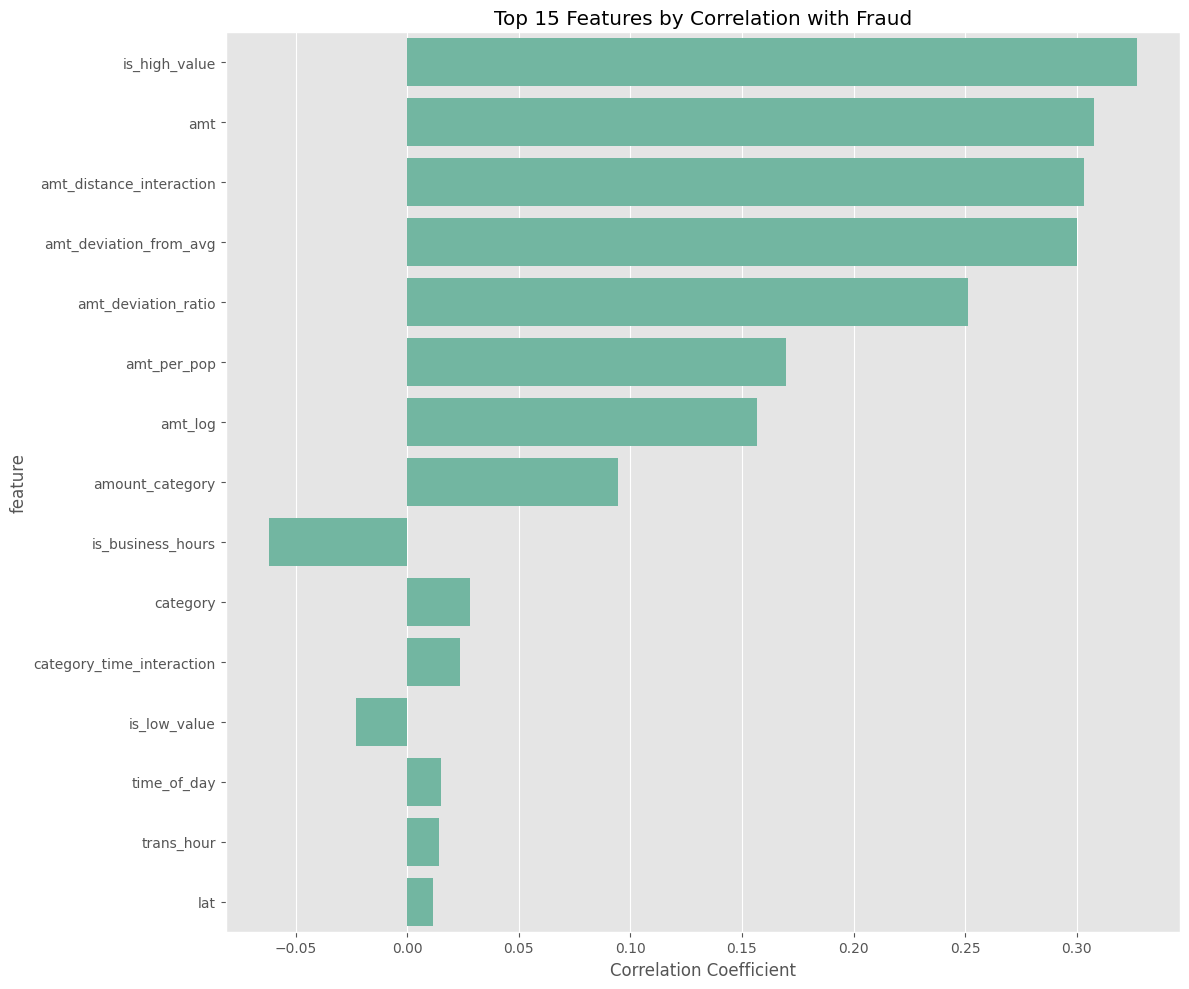

In [55]:
# Visualize top features
plt.figure(figsize=(12, 10))
top_features = correlation_with_target.head(15)
sns.barplot(x='correlation', y='feature', data=top_features)
plt.title('Top 15 Features by Correlation with Fraud')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [56]:
# Analyze positive and negative correlations
print("Most positively correlated features with fraud:")
print(correlation_with_target[correlation_with_target['correlation'] > 0].head(10))

print("\nMost negatively correlated features with fraud:")
print(correlation_with_target[correlation_with_target['correlation'] < 0].head(10))

Most positively correlated features with fraud:
                      feature  correlation
25              is_high_value     0.326871
1                         amt     0.307713
33   amt_distance_interaction     0.303173
29     amt_deviation_from_avg     0.300055
30        amt_deviation_ratio     0.251141
24                amt_per_pop     0.169566
23                    amt_log     0.156624
28            amount_category     0.094635
0                    category     0.028253
32  category_time_interaction     0.023819

Most negatively correlated features with fraud:
                  feature  correlation
17      is_business_hours    -0.061984
26           is_low_value    -0.022771
14       trans_is_weekend    -0.010462
31  time_since_last_trans    -0.006471
3                     zip    -0.004761
2                  gender    -0.002380
22       unusual_location    -0.002340
27        is_round_amount    -0.001566
9              merch_long    -0.001392
5                    long    -0.001373


In [60]:
# --- STEP 12: COMPLETE DATA CLEANING AND ENCODING ---
# Ensure ALL columns are properly encoded before modeling

In [61]:
print("=== COMPREHENSIVE DATA CLEANING ===")

# Check current data types
print("Current data types:")
print(X.dtypes.value_counts())


=== COMPREHENSIVE DATA CLEANING ===
Current data types:
float64    33
int64       2
Name: count, dtype: int64


In [62]:
# Identify any remaining object/string columns
object_cols = X.select_dtypes(include=['object']).columns
print(f"\nObject columns found: {list(object_cols)}")

# Check what's in these columns
for col in object_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values: {X[col].unique()[:10]}")  # Show first 10
    print(f"Data type: {X[col].dtype}")


Object columns found: []


In [63]:
# Convert ALL object columns to numeric using Label Encoding
label_encoders = {}
for col in object_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"  -> Converted to numeric with {X[col].nunique()} unique values")

print("\nFinal data types after encoding:")
print(X.dtypes.value_counts())


Final data types after encoding:
float64    33
int64       2
Name: count, dtype: int64


In [64]:
# Also ensure y is numeric
y = y.astype(int)
print(f"\nTarget variable type: {y.dtype}")


Target variable type: int64


In [65]:
# --- STEP 13: RE-SPLIT THE DATA AFTER CLEANING ---
# Since we modified X, we need to re-split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data re-split after final cleaning:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data re-split after final cleaning:
X_train shape: (65361, 35)
X_test shape: (16341, 35)
y_train shape: (65361,)
y_test shape: (16341,)


In [67]:
# --- STEP 14: FEATURE IMPORTANCE PREVIEW ---
# Quick Random Forest to see feature importance


In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
print("=== FEATURE IMPORTANCE PREVIEW ===")

# First, verify all data is numeric
print("Verifying all data is numeric...")
print(f"X_train dtypes: {X_train.dtypes.value_counts()}")
print(f"X_test dtypes: {X_test.dtypes.value_counts()}")
print(f"y_train dtype: {y_train.dtype}")
print(f"y_test dtype: {y_test.dtype}")

=== FEATURE IMPORTANCE PREVIEW ===
Verifying all data is numeric...
X_train dtypes: float64    33
int64       2
Name: count, dtype: int64
X_test dtypes: float64    33
int64       2
Name: count, dtype: int64
y_train dtype: int64
y_test dtype: int64


In [70]:
# Check for any non-finite values
print(f"\nNon-finite values in X_train: {np.isinf(X_train.values).sum()}")
print(f"Non-finite values in X_test: {np.isinf(X_test.values).sum()}")


Non-finite values in X_train: 0
Non-finite values in X_test: 0


 Random Forest trained successfully!

Top 15 features by Random Forest importance:


,feature,importance
1,amt,0.259028
23,amt_log,0.165646
29,amt_deviation_from_avg,0.151184
25,is_high_value,0.092690
33,amt_distance_interaction,0.079733
28,amount_category,0.056187
30,amt_deviation_ratio,0.044036
10,trans_hour,0.036679
32,category_time_interaction,0.020722
17,is_business_hours,0.018431


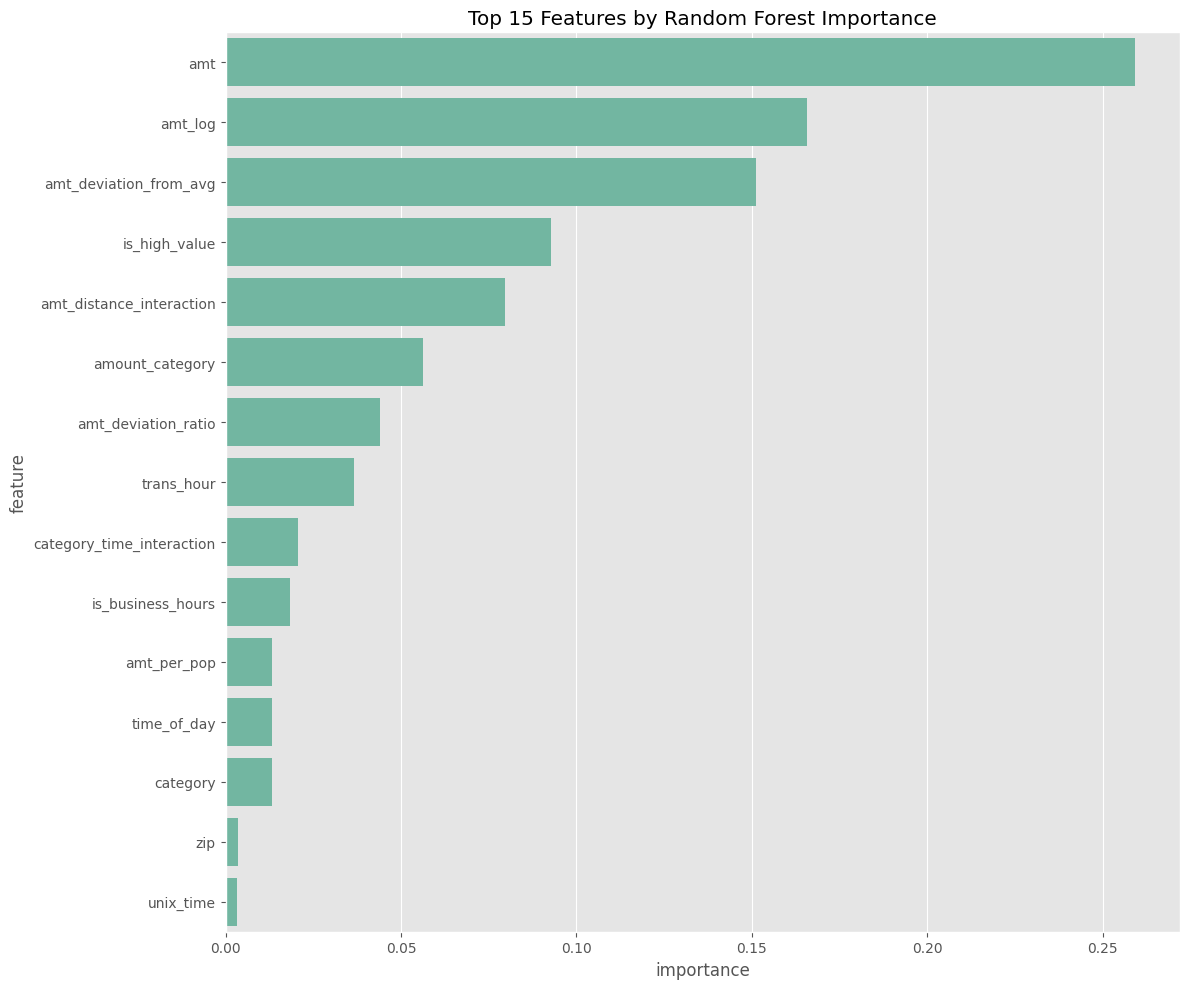

In [88]:
# Train a quick model to see feature importance
try:
    rf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=5, class_weight='balanced')
    rf.fit(X_train, y_train)
    print(" Random Forest trained successfully!")

    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 15 features by Random Forest importance:")
    display(feature_importance.head(15))

    # Plot feature importance
    plt.figure(figsize=(12, 10))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 Features by Random Forest Importance')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f" Error training Random Forest: {e}")
    print("\nDebugging information:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_train sample:\n{X_train.head()}")
    print(f"y_train sample:\n{y_train.head()}")

In [72]:
# --- STEP 15: FINAL DATA VALIDATION ---
# Comprehensive validation to ensure data quality

In [73]:
print("=== COMPREHENSIVE DATA VALIDATION ===")

# 1. Check data types
print("1. Data Types:")
print(f"X dtypes: {X.dtypes.value_counts()}")
print(f"y dtype: {y.dtype}")

=== COMPREHENSIVE DATA VALIDATION ===
1. Data Types:
X dtypes: float64    33
int64       2
Name: count, dtype: int64
y dtype: int64


In [74]:
# 2. Check for missing values
print("\n2. Missing Values:")
print(f"X missing: {X.isnull().sum().sum()}")
print(f"y missing: {y.isnull().sum()}")


2. Missing Values:
X missing: 0
y missing: 0


In [75]:
# 3. Check for infinite values
print("\n3. Infinite Values:")
print(f"X infinite: {np.isinf(X.values).sum()}")
print(f"y infinite: {np.isinf(y.values).sum() if hasattr(y, 'values') else 0}")


3. Infinite Values:
X infinite: 0
y infinite: 0


In [76]:
# 4. Check shapes
print("\n4. Data Shapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


4. Data Shapes:
X shape: (81702, 35)
y shape: (81702,)
X_train shape: (65361, 35)
X_test shape: (16341, 35)
y_train shape: (65361,)
y_test shape: (16341,)


In [77]:
# 4. Check shapes
print("\n4. Data Shapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


4. Data Shapes:
X shape: (81702, 35)
y shape: (81702,)
X_train shape: (65361, 35)
X_test shape: (16341, 35)
y_train shape: (65361,)
y_test shape: (16341,)


In [87]:
# 6. Check data ranges
print("\n6. Data Ranges (min/max):")
for col in X.columns[:5]:  # Show first 5 columns
    print(f"  {col}: {X[col].min():.2f} to {X[col].max():.2f}")

print("\n Data validation completed!")


6. Data Ranges (min/max):
  category: -0.86 to 1.00
  amt: -0.63 to 171.84
  gender: 0.00 to 1.00
  zip: -1.02 to 1.12
  lat: -2.69 to 3.67

 Data validation completed!


In [83]:
# --- STEP 16: CORRELATION ANALYSIS ---
# Analyze the final feature set safely

In [80]:
# Create a copy and ensure everything is numeric
correlation_df = X.copy()
correlation_df['is_fraud'] = y

In [81]:
# Use pandas corr() which handles numeric data safely
corr_matrix = correlation_df.corr()

correlation_with_target = pd.DataFrame({
    'feature': corr_matrix.columns[:-1],  # Exclude target
    'correlation': corr_matrix['is_fraud'].values[:-1]  # Exclude self-correlation
}).sort_values('correlation', key=abs, ascending=False)

print("Top 20 features by absolute correlation with target:")
display(correlation_with_target.head(20))

Top 20 features by absolute correlation with target:


,feature,correlation
25,is_high_value,0.326871
1,amt,0.307713
33,amt_distance_interaction,0.303173
29,amt_deviation_from_avg,0.300055
30,amt_deviation_ratio,0.251141
24,amt_per_pop,0.169566
23,amt_log,0.156624
28,amount_category,0.094635
17,is_business_hours,-0.061984
0,category,0.028253


from matplotlib import pyplot as plt
_df_5['correlation'].plot(kind='hist', bins=20, title='correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['correlation'].plot(kind='line', figsize=(8, 4), title='correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

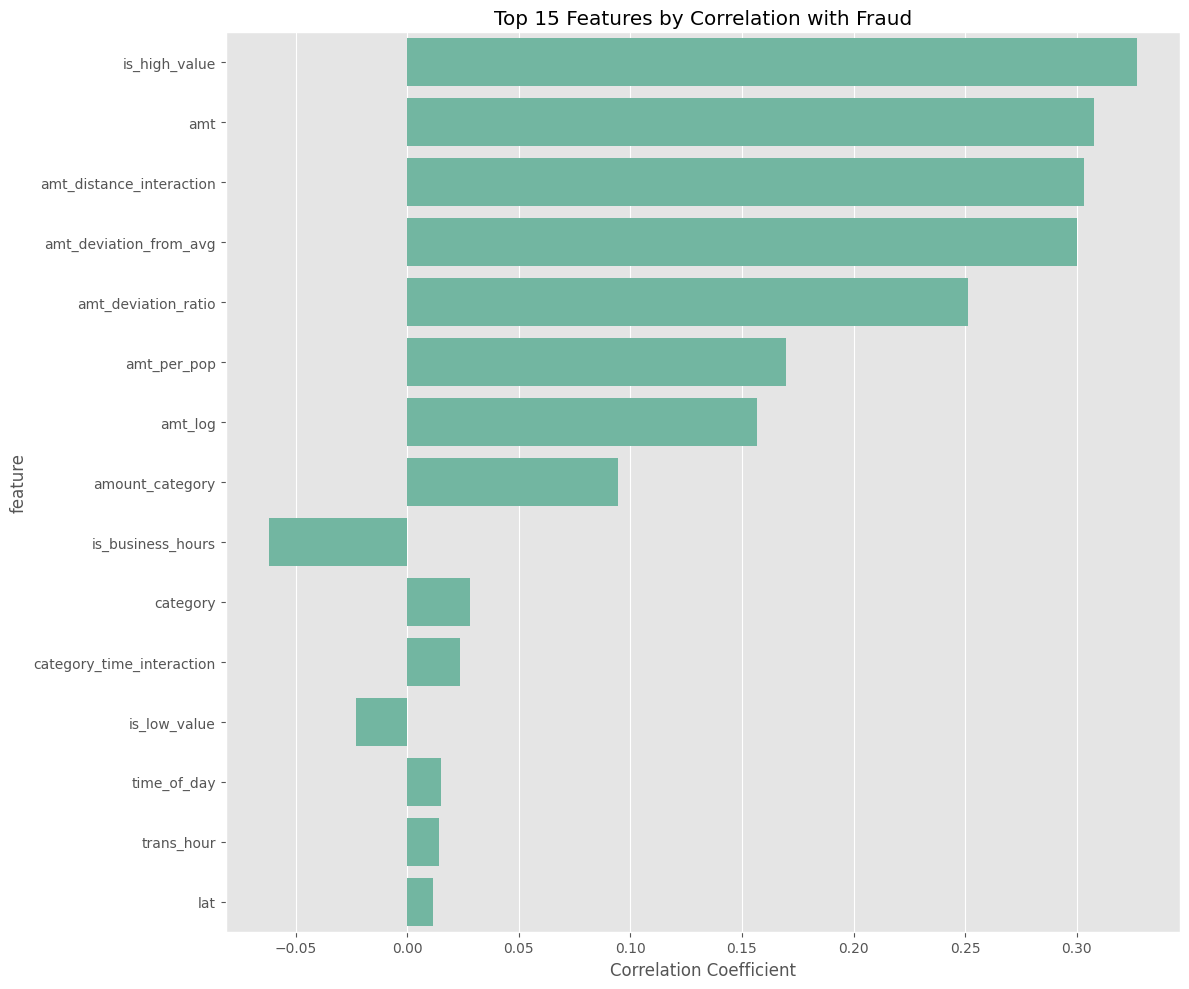

In [82]:
# Visualize top features
plt.figure(figsize=(12, 10))
top_features = correlation_with_target.head(15)
sns.barplot(x='correlation', y='feature', data=top_features)
plt.title('Top 15 Features by Correlation with Fraud')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [84]:
# --- STEP 17: SAVE PROCESSED DATA ---
# Save the final processed data

In [85]:
print("=== PROCESSING COMPLETE ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final processed dataset shape: {X.shape}")
print(f"Number of features created: {X.shape[1]}")
print(f"Target variable distribution: {y.value_counts().to_dict()}")

=== PROCESSING COMPLETE ===
Original dataset shape: (81703, 23)
Final processed dataset shape: (81702, 35)
Number of features created: 35
Target variable distribution: {0: 80900, 1: 802}


In [86]:
# Save feature names for reference
feature_names = X.columns.tolist()
print(f"\nFeature names saved ({len(feature_names)} features)")

print("\n Advanced feature engineering completed successfully!")



Feature names saved (35 features)

 Advanced feature engineering completed successfully!
